### NIFTY - 50 & Other NIFTY INDICES TRENDS  AFTER COVID-19| Exploratory Data Analysis

#### About The DataSet Chosen

The dataset consists of 7 files.Let's quickly understand what those are:

* **NIFTY 50** - This represents the first 50 companies based on full market capitalisation.

* **NIFTY SECTORAL INDICES** - This includes NIFTY AUTO,NIFTY BANK, NIFTY FMCG, NIFTY IT,NIFTY METAL, NIFTY PHARMA. These Indices are designed to reflect the behavior and performance of the segment that they reflect i.e automobiles, bank, pharma etc.

#### Objective of This Data Analysis

The objective of this Analysis is to explore NIFTY-50 data along with the sectoral indices and visualise them to obtain important information after the Covid-19.

#### STEP 1 - Importing Necessary Python Libraries

In [1]:
!pip install plotly

In [2]:
import pandas as pd  # for Data cleaning, Data Reading etc
import numpy as np # for the Mathimatical and Analytical work
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import plot,iplot,init_notebook_mode # to display the plot when working on offline 
import datetime
import time
init_notebook_mode(connected=True)

In [3]:
# try to installing cufflinks to join the pandas with plotly
!pip install cufflinks --upgrade

In [4]:
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

In [5]:
# for the export plotly graph in svg or jpg format
!pip install -U kaleido

### STEP 2 - Data Preparation and Cleaning For NIFTY-50 Data set

In [6]:
nifty_50 = pd.read_csv("C:/Users/Lenovo/OneDrive/Desktop/Choice-Data/Assignment-2/NIFTY_50.csv", parse_dates = ["Date"])

In [7]:
nifty_50.head()

,Date,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
0,2000-01-03,1482.15,1592.90,1482.15,1592.2,25358322.0,8.841500e+09,25.91,4.63,0.95
1,2000-01-04,1594.40,1641.95,1594.40,1638.7,38787872.0,1.973690e+10,26.67,4.76,0.92
2,2000-01-05,1634.55,1635.50,1555.05,1595.8,62153431.0,3.084790e+10,25.97,4.64,0.95
3,2000-01-06,1595.80,1639.00,1595.80,1617.6,51272875.0,2.531180e+10,26.32,4.70,0.94
4,2000-01-07,1616.60,1628.25,1597.20,1613.3,54315945.0,1.914630e+10,26.25,4.69,0.94


Following are the meaning of column which shown in above Dataset

* **The Open and Close columns** indicate the opening and closing price of the stocks on a particular day.
* **The High and Low columns** provide the highest and the lowest price for the stock on a particular day, respectively.
* **The Volume column** tells us the total volume of stocks traded on a particular day.
* **The Turnover column** refers to the total value of stocks traded during a specific period of time. The time period may be annually, quarterly, monthly or daily
* **P/E** also called as the price-earnings ratio relates a company's share price to its earnings per share.
* **P/B** also called as Price-To-Book ratio measures the market's valuation of a company relative to its book value.
* **Div Yield** or the dividend yield is the amount of money a company pays shareholders (over the course of a year) for owning a share of its stock divided by its current stock price—displayed as a percentage.  

In [8]:
nifty_50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5116 entries, 0 to 5115
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5116 non-null   datetime64[ns]
 1   Open       5116 non-null   float64       
 2   High       5116 non-null   float64       
 3   Low        5116 non-null   float64       
 4   Close      5116 non-null   float64       
 5   Volume     5115 non-null   float64       
 6   Turnover   5115 non-null   float64       
 7   P/E        5116 non-null   float64       
 8   P/B        5116 non-null   float64       
 9   Div Yield  5116 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 399.8 KB


In [9]:
nifty_50.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       1
Turnover     1
P/E          0
P/B          0
Div Yield    0
dtype: int64

In [10]:
# columns "Volume" and "Turnover" have 1 null value each.fill the missing values with the previous ones.

nifty_50.fillna(method = "pad", inplace = True)  

In [11]:
nifty_50.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Turnover     0
P/E          0
P/B          0
Div Yield    0
dtype: int64

#### Now Data Preparation and Cleaning For other Nifty Sectoral Indices 

In [12]:
# Importing

nifty_auto = pd.read_csv("C:/Users/Lenovo/OneDrive/Desktop/Choice-Data/Assignment-2/NIFTY_AUTO.csv",parse_dates=["Date"])
nifty_bank = pd.read_csv("C:/Users/Lenovo/OneDrive/Desktop/Choice-Data/Assignment-2/NIFTY_BANK.csv",parse_dates=["Date"])
nifty_fmcg = pd.read_csv("C:/Users/Lenovo/OneDrive/Desktop/Choice-Data/Assignment-2/NIFTY_FMCG.csv",parse_dates=["Date"])
nifty_IT = pd.read_csv("C:/Users/Lenovo/OneDrive/Desktop/Choice-Data/Assignment-2/NIFTY_IT.csv",parse_dates=["Date"])
nifty_metal = pd.read_csv("C:/Users/Lenovo/OneDrive/Desktop/Choice-Data/Assignment-2/NIFTY_METAL.csv",parse_dates=["Date"])
nifty_pharma = pd.read_csv("C:/Users/Lenovo/OneDrive/Desktop/Choice-Data/Assignment-2/NIFTY_PHARMA.csv",parse_dates=["Date"])

# Cleaning
nifty_auto.fillna(method='pad',inplace=True)
nifty_bank.fillna(method='pad',inplace=True)
nifty_fmcg.fillna(method='pad',inplace=True)
nifty_IT.fillna(method='pad',inplace=True)
nifty_metal.fillna(method='pad',inplace=True)
nifty_pharma.fillna(method='pad',inplace=True)

In [13]:
print('nifty_auto Data set:\n', nifty_auto.head())
print('nifty_fmcg Data set: \n',nifty_fmcg.tail())

nifty_auto Data set:
         Date  Open  High  Low    Close  Volume  Turnover  P/E  P/B  Div Yield
0 2004-01-01   NaN   NaN  NaN  1000.00     NaN       NaN  NaN  NaN        NaN
1 2004-01-02   NaN   NaN  NaN  1007.13     NaN       NaN  NaN  NaN        NaN
2 2004-01-05   NaN   NaN  NaN   998.13     NaN       NaN  NaN  NaN        NaN
3 2004-01-06   NaN   NaN  NaN   984.52     NaN       NaN  NaN  NaN        NaN
4 2004-01-07   NaN   NaN  NaN   974.54     NaN       NaN  NaN  NaN        NaN
nifty_fmcg Data set: 
            Date      Open      High       Low     Close      Volume  \
5111 2020-07-21  31626.80  31708.00  31240.90  31280.25  48250528.0   
5112 2020-07-22  31420.85  31422.30  30946.35  31051.60  58426954.0   
5113 2020-07-23  31177.90  31326.45  31052.40  31101.90  54206420.0   
5114 2020-07-24  31009.95  31138.55  30653.40  31018.85  80399286.0   
5115 2020-07-27  31129.45  31183.15  30708.20  30819.75  80399286.0   

          Turnover    P/E    P/B  Div Yield  
5111  3.277190

In [14]:
nifty_bank.tail()

,Date,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
5112,2020-07-21,22639.85,22861.90,22597.95,22782.00,316649600.0,9.744390e+10,24.38,2.07,0.40
5113,2020-07-22,23159.00,23211.35,22658.20,22882.60,412721326.0,1.134974e+11,24.49,2.08,0.39
5114,2020-07-23,22854.85,23122.35,22734.90,23083.90,307580829.0,8.038760e+10,24.88,2.10,0.39
5115,2020-07-24,22853.20,22854.05,22417.20,22662.05,436264876.0,9.908170e+10,24.43,2.06,0.40
5116,2020-07-27,22664.60,22668.05,21801.35,21848.75,436264876.0,9.908170e+10,23.55,1.99,0.41


In [15]:
nifty_auto_2019 = nifty_auto[nifty_auto['Date'] > '2019-12-31']
nifty_bank_2019 = nifty_bank[nifty_bank['Date'] > '2019-12-31']
nifty_fmcg_2019 = nifty_fmcg[nifty_fmcg['Date'] > '2019-12-31']
nifty_IT_2019 = nifty_IT[nifty_IT['Date'] > '2019-12-31']
nifty_metal_2019 = nifty_metal[nifty_metal['Date'] > '2019-12-31']
nifty_pharma_2019 = nifty_pharma[nifty_pharma['Date'] > '2019-12-31']

data = {'NIFTY Auto index': nifty_auto_2019['Close'].values, 
        'NIFTY Bank index': nifty_bank_2019['Close'].values,
        'NIFTY FMCG index': nifty_fmcg_2019['Close'].values,
        'NIFTY IT index': nifty_IT_2019['Close'].values,
        'NIFTY Metal index': nifty_metal_2019['Close'].values,
        'NIFTY Pharma index': nifty_pharma_2019['Close'].values,
       }
combine_close = pd.DataFrame(data=data)
combine_close.index=nifty_auto_2019['Date']
combine_close.head()

,NIFTY Auto index,NIFTY Bank index,NIFTY FMCG index,NIFTY IT index,NIFTY Metal index,NIFTY Pharma index
Date,,,,,,
2020-01-01,8210.10,32102.90,30234.25,15722.15,2796.05,8047.10
2020-01-02,8267.45,32443.85,30266.20,15709.65,2869.90,8053.95
2020-01-03,8168.15,32069.25,30109.25,15936.60,2848.35,8111.95
2020-01-06,7978.75,31237.15,29799.30,15879.80,2765.75,7987.35
2020-01-07,8002.50,31399.40,29861.80,15895.20,2785.90,8036.50


### STEP 3 - Visualization & EDA work for NIFTY-50 Data Set

Let's first check the **NIFTY - 50 Trend** over the years.

In [16]:
fig = go.Figure(data=[go.Candlestick(x=nifty_50['Date'],open=nifty_50['Open'],high=nifty_50['High'],low=nifty_50['Low'],
                close=nifty_50['Close'])])
fig.update_layout(title_text='NIFTY - 50 Trend (2000 - 2020)',plot_bgcolor='rgb(250, 242, 242)',yaxis_title='Value', 
                  width=1000, height=600)

fig.show("svg")

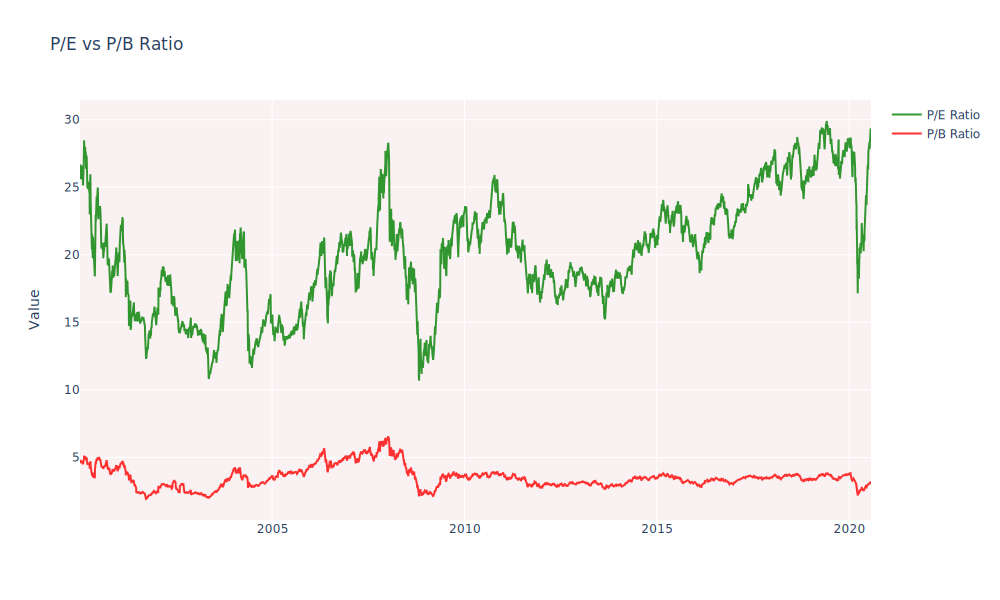

In [17]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=nifty_50['Date'],y=nifty_50['P/E'],name='P/E Ratio',line=dict(color='green'),opacity=0.8))
fig.add_trace(go.Scatter(x=nifty_50['Date'],y=nifty_50['P/B'],name='P/B Ratio',line=dict(color='red'),opacity=0.8))
fig.update_layout(title_text='P/E vs P/B Ratio',plot_bgcolor='rgb(250, 242, 242)',yaxis_title='Value',width=1000, height=600)

fig.show("svg")

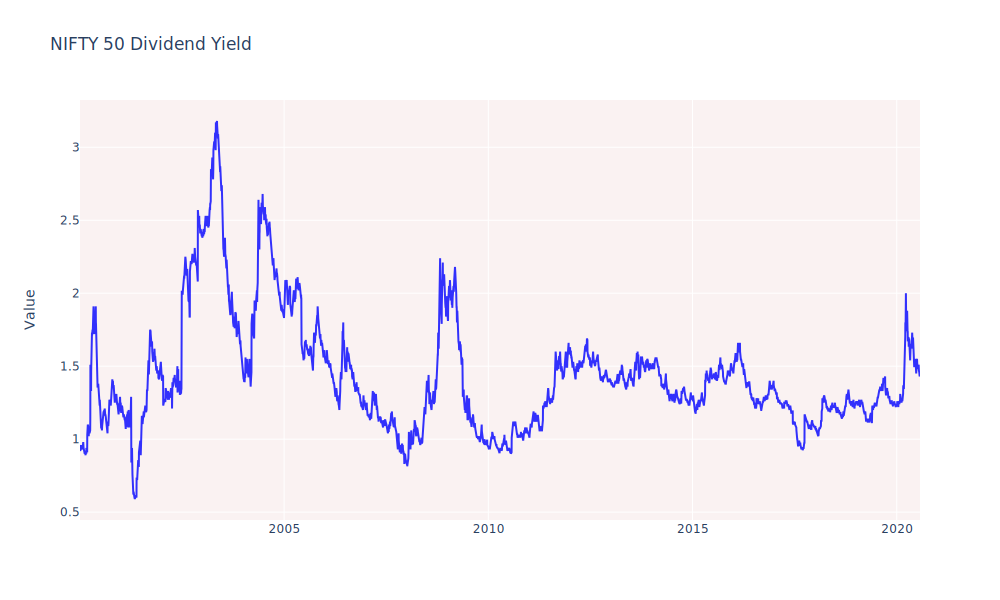

In [18]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=nifty_50['Date'],y=nifty_50['Div Yield'],name='Dividend Yield',line=dict(color='blue'),opacity=0.8))
fig.update_layout(title_text='NIFTY 50 Dividend Yield',plot_bgcolor='rgb(250, 242, 242)',yaxis_title='Value',
                  width=1000, height=600)

fig.show("svg")

### STEP 4 - Analysis the data set and trend of market after the Covid-19 

##### 1) First try to Analysis the and checking the tread of the Nifty from 2019 to present after covid-19

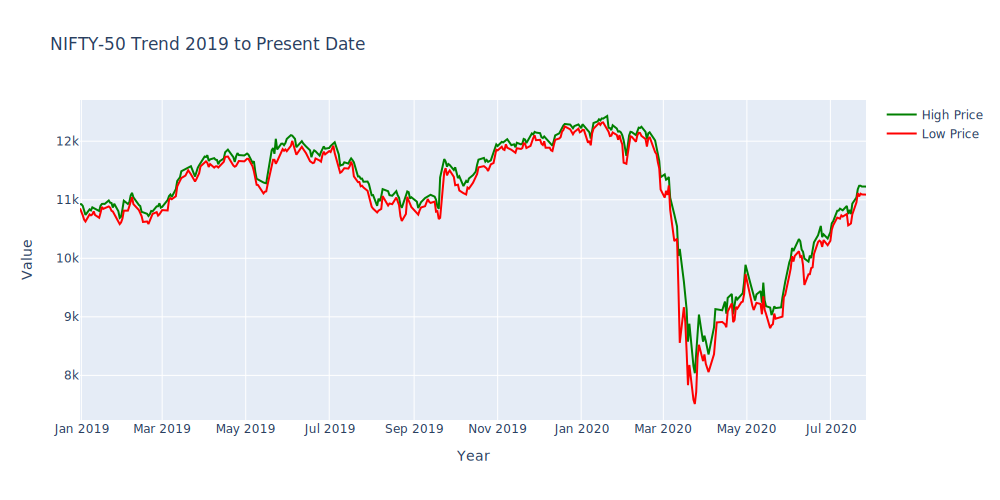

In [19]:
nifty_50_2019_2020 = nifty_50[(nifty_50['Date'] >= '2018-12-31')]
fig = go.Figure()
fig.add_trace(go.Scatter(x=nifty_50_2019_2020['Date'],y=nifty_50_2019_2020['High'],name='High Price',line=dict(color='green'),
                         opacity=1))

fig.add_trace(go.Scatter(x=nifty_50_2019_2020['Date'],y=nifty_50_2019_2020['Low'], name='Low Price',line=dict(color='red'),
    opacity=1))
            
fig.update_layout(title_text="NIFTY-50 Trend 2019 to Present Date",xaxis_title = 'Year', yaxis_title='Value',
                 width=1000, height=500)

fig.show("svg")

**** Try to following news impacted on the market ****
* Lockdown announced
* Coronavirus declared Pandemic by WHO
* 2019 General Elections
* Dates of these news announcements were taken from the internet.

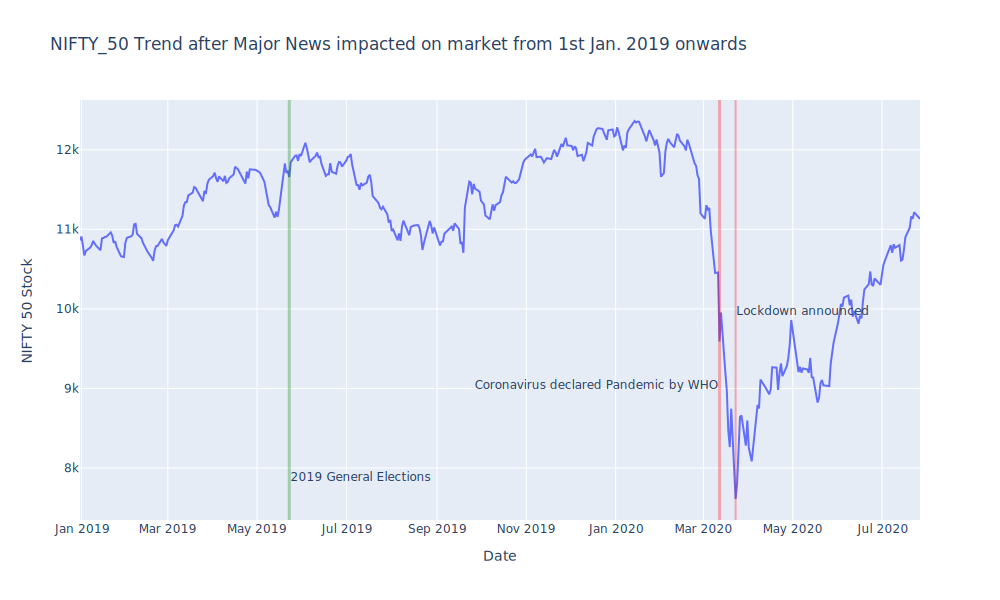

In [20]:
fig = px.line(nifty_50_2019_2020, x='Date', y='Close', title='Time Series')

fig.update_layout(title='NIFTY_50 Trend after Major News impacted on market from 1st Jan. 2019 onwards',width=1000, height=600,
    yaxis_title='NIFTY 50 Stock',
    shapes = [dict(x0='2020-03-23', x1='2020-03-23', y0=0, y1=1, xref='x', yref='paper', line_width=2,opacity=0.3,
                   line_color='red',editable=False),
              dict(x0='2020-03-12', x1='2020-03-12', y0=0, y1=1, xref='x', yref='paper',line_width=3,opacity=0.3,
                   line_color='red'),
              dict(x0='2019-05-23', x1='2019-05-23', y0=0, y1=1, xref='x', yref='paper',line_width=3,opacity=0.3,
                   line_color='green')],
    annotations=[dict(x='2020-03-23', y=0.5, xref='x', yref='paper',
                    showarrow=False, xanchor='left', text='Lockdown announced'),
                 dict(x='2020-03-12', y=0.3, xref='x', yref='paper',
                    showarrow=False, xanchor='right', text='Coronavirus declared Pandemic by WHO'),
                 dict(x='2019-05-23', y=0.08, xref='x', yref='paper',
                    showarrow=False, xanchor='left', text='2019 General Elections')])
fig.show("svg")

**** Try to to find out performance of differnet Sector after Covid-19 ****

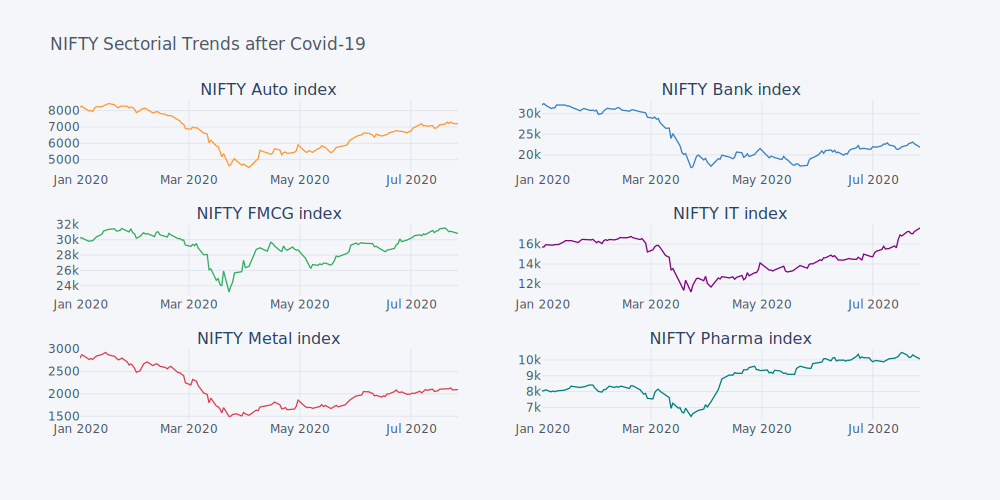

In [21]:
fig = combine_close.iplot(asFigure=True, subplots=True, subplot_titles=True, legend=False)
fig.update_layout(title_text="NIFTY Sectorial Trends after Covid-19",width=1000, height=500)
fig.show("svg")

**** As Now Days IT and Automobile Sector are performing better than other so try to check there last 5-year performance****

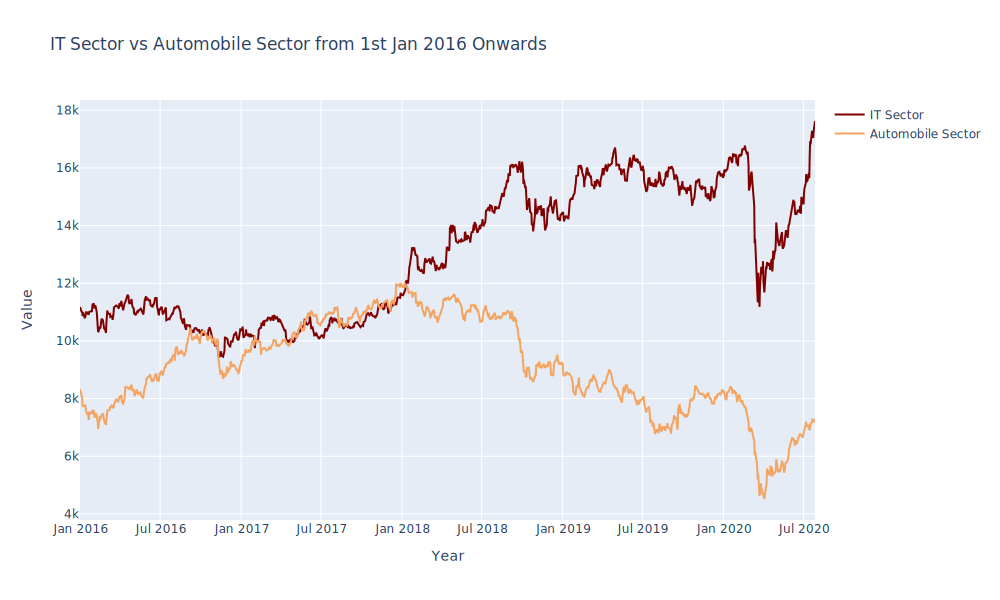

In [22]:
nifty_IT_5_years = nifty_IT[nifty_IT['Date'] > '2015-12-31']
nifty_auto_5_years = nifty_auto[nifty_auto['Date'] > '2015-12-31']

fig = go.Figure()
fig.add_trace(go.Scatter(x=nifty_IT_5_years['Date'],y=nifty_IT_5_years['Close'],name='IT Sector',line=dict(color='maroon'),
    opacity=1))

fig.add_trace(go.Scatter(x=nifty_auto_5_years['Date'],y=nifty_auto_5_years['Close'],name='Automobile Sector',
                         line=dict(color='sandybrown'),
    opacity=1))
        
fig.update_layout(title_text="IT Sector vs Automobile Sector from 1st Jan 2016 Onwards", xaxis_title = 'Year', 
                  yaxis_title='Value',width=1000, height=600)

fig.show("svg")

**** From the above visulaization we can said that late 2016 and early 2018, Automobile Sector was giving good competition to          IT Sector, but currently IT Sector is performing better than Automobile Sector. ****

In [23]:
nifty_IT_current = nifty_IT[nifty_IT['Date'] > '2019-12-31']['Turnover'].mean()
nifty_bank_current = nifty_bank[nifty_bank['Date'] > '2019-12-31']['Turnover'].mean()
nifty_auto_current = nifty_auto[nifty_auto['Date'] > '2019-12-31']['Turnover'].mean()
nifty_fmcg_current = nifty_fmcg[nifty_fmcg['Date'] > '2019-12-31']['Turnover'].mean()
nifty_metal_current = nifty_metal[nifty_metal['Date'] > '2019-12-31']['Turnover'].mean()
nifty_pharma_current = nifty_pharma[nifty_pharma['Date'] > '2019-12-31']['Turnover'].mean()

**** By Finding the mean of the Turnovers of different Sectors & ploting a Pie chart to check the                                    current Turnovers of Different Sectors ****

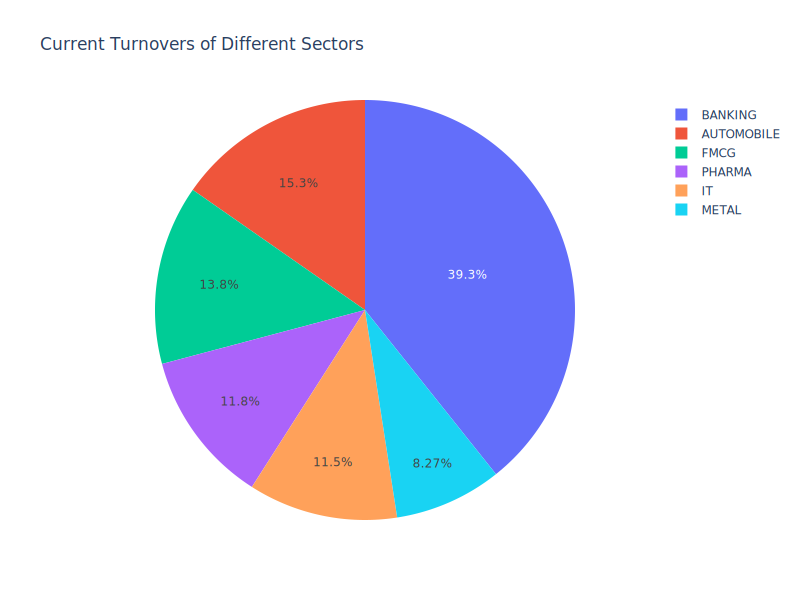

In [24]:
labels = ['IT','BANKING','AUTOMOBILE','FMCG', 'METAL', 'PHARMA']
values = [nifty_IT_current, nifty_bank_current, nifty_auto_current, nifty_fmcg_current, nifty_metal_current, 
          nifty_pharma_current]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title_text="Current Turnovers of Different Sectors",width=800, height=600)
fig.show("svg")

###  Conclusion

* The market is touch the low after Covid-19 in March-2020 which is at level 7,500 which nearly 2016 Nifty level.
* The market slumped due to COVID-19, but the sectors are now slowly recovering.
* Amongst all the sectors, IT and FMCG are faring better than the others. Pharma market is also showing growth after the Covid-19 which shows the growing demand for medicines.
* Comparing the sectors Turnover-wise, Banking sector is leading with Automobile Sector close behind. IT and Pharma have nearly the same turnover and are quickly approaching the FMCG market.
* Checking the past trends of IT and Automobile sectors, we saw they were giving huge competition to each-other between 2017-2018, but now Automobile sector's growth fell  as compared to IT Sector.
* It can be concluded from the above analysis that the downfall of markets have occurred many times due to differnt critical condition, but Market always recovered with more brighter prospects.

#### References and Future Work
Following websites were very helpfull for me -

* https://indianexpress.com/
* https://plotly.com/python/
* https://www.kaggle.com/

